<a href="https://colab.research.google.com/github/fouad89/Deep-Learning/blob/master/Lab_Cats_Dogs_Birds_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A code practice 
For the designated lab (Birds, Cats and Dogs)

In [1]:
# Download datasets

# Cats and dogs
!wget https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip

# Caltech birds
!wget https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar

# Download pretrained models and training histories
!wget -q -P /content/model-balanced/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/saved_model.pb
!wget -q -P /content/model-balanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/variables/variables.data-00000-of-00001
!wget -q -P /content/model-balanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-balanced/variables/variables.index
!wget -q -P /content/history-balanced/ https://storage.googleapis.com/mlep-public/course_1/week2/history-balanced/history-balanced.csv

!wget -q -P /content/model-imbalanced/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/saved_model.pb
!wget -q -P /content/model-imbalanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/variables/variables.data-00000-of-00001
!wget -q -P /content/model-imbalanced/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-imbalanced/variables/variables.index
!wget -q -P /content/history-imbalanced/ https://storage.googleapis.com/mlep-public/course_1/week2/history-imbalanced/history-imbalanced.csv

!wget -q -P /content/model-augmented/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/saved_model.pb
!wget -q -P /content/model-augmented/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/variables/variables.data-00000-of-00001
!wget -q -P /content/model-augmented/variables/ https://storage.googleapis.com/mlep-public/course_1/week2/model-augmented/variables/variables.index
!wget -q -P /content/history-augmented/ https://storage.googleapis.com/mlep-public/course_1/week2/history-augmented/history-augmented.csv

--2022-06-14 10:31:56--  https://storage.googleapis.com/mlep-public/course_1/week2/kagglecatsanddogs_3367a.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/zip]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  70.1MB/s    in 14s     

2022-06-14 10:32:11 (55.7 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]

--2022-06-14 10:32:11--  https://storage.googleapis.com/mlep-public/course_1/week2/CUB_200_2011.tar
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12594790

In [2]:
import os
import shutil # copying/moving files
import random
import zipfile # unzipping 
import tarfile # handling compressed folder
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# To ignore some warnings about Image metadata that Pillow prints out
import warnings
warnings.filterwarnings("ignore")


In [3]:
# list of the content dir to get the names of folders and models
os.listdir('/content')

['.config',
 'model-balanced',
 'model-imbalanced',
 'history-imbalanced',
 'history-balanced',
 'history-augmented',
 'model-augmented',
 'CUB_200_2011.tar',
 'kagglecatsanddogs_3367a.zip',
 'sample_data']

In [5]:
cats_dogs_dir = '/content/kagglecatsanddogs_3367a.zip'
caltech_dir = '/content/CUB_200_2011.tar'
base_dir = '/content/data' # target directory to save data

# uncompressing folders
with zipfile.ZipFile(cats_dogs_dir, 'r') as my_zip:
    my_zip.extractall(base_dir)

with tarfile.open(caltech_dir, 'r') as my_tar:
    my_tar.extractall(base_dir)

In [6]:
os.listdir()

['.config',
 'model-balanced',
 'model-imbalanced',
 'history-imbalanced',
 'history-balanced',
 'history-augmented',
 'data',
 'model-augmented',
 'CUB_200_2011.tar',
 'kagglecatsanddogs_3367a.zip',
 'sample_data']

In [7]:
# base dir content
print(os.listdir(base_dir))
print(f"Pet Images Folder Content")
print(os.listdir(os.path.join(base_dir, 'PetImages')))

['MSR-LA - 3467.docx', 'CUB_200_2011', 'PetImages', 'attributes.txt', 'readme[1].txt']
Pet Images Folder Content
['Cat', 'Dog']


In [8]:
dogs_dir = os.path.join(base_dir, 'PetImages', 'Dog')
cats_dir = os.path.join(base_dir, 'PetImages', 'Cat')
print(f'Number of Dog Images is: {len(os.listdir(dogs_dir))}')
print(f'Number of Cats Images is: {len(os.listdir(cats_dir))}')

Number of Dog Images is: 12501
Number of Cats Images is: 12501


In [9]:
# inspecting the birds directory
birds_dir = os.path.join(base_dir, 'CUB_200_2011')
print(os.listdir(birds_dir))
initial_images_dir = os.path.join(birds_dir, 'images')
print('Birds images folders')
print(os.listdir(initial_images_dir))
birds_dir = os.path.join(base_dir,'PetImages/Bird')
print(birds_dir)
if not os.path.exists(birds_dir):
    os.makedirs(birds_dir)
# # moving the images from subdirectories to one directory
for sub_folder in os.listdir(initial_images_dir):
    sub_folder_path = os.path.join(initial_images_dir, sub_folder)

    for img in os.listdir(sub_folder_path):
        shutil.move(os.path.join(sub_folder_path, img), birds_dir)
print(f"Number of Bird images: {len(os.listdir(birds_dir))}")


['image_class_labels.txt', 'train_test_split.txt', 'parts', 'bounding_boxes.txt', 'images.txt', 'attributes', 'classes.txt', 'images', 'README']
Birds images folders
['017.Cardinal', '158.Bay_breasted_Warbler', '161.Blue_winged_Warbler', '070.Green_Violetear', '093.Clark_Nutcracker', '185.Bohemian_Waxwing', '034.Gray_crowned_Rosy_Finch', '163.Cape_May_Warbler', '121.Grasshopper_Sparrow', '178.Swainson_Warbler', '018.Spotted_Catbird', '014.Indigo_Bunting', '106.Horned_Puffin', '162.Canada_Warbler', '190.Red_cockaded_Woodpecker', '176.Prairie_Warbler', '010.Red_winged_Blackbird', '192.Downy_Woodpecker', '046.Gadwall', '180.Wilson_Warbler', '138.Tree_Swallow', '030.Fish_Crow', '107.Common_Raven', '150.Sage_Thrasher', '120.Fox_Sparrow', '006.Least_Auklet', '167.Hooded_Warbler', '077.Tropical_Kingbird', '080.Green_Kingfisher', '189.Red_bellied_Woodpecker', '097.Orchard_Oriole', '145.Elegant_Tern', '059.California_Gull', '108.White_necked_Raven', '140.Summer_Tanager', '086.Pacific_Loon', '05

## Display Images

Sample cat image:


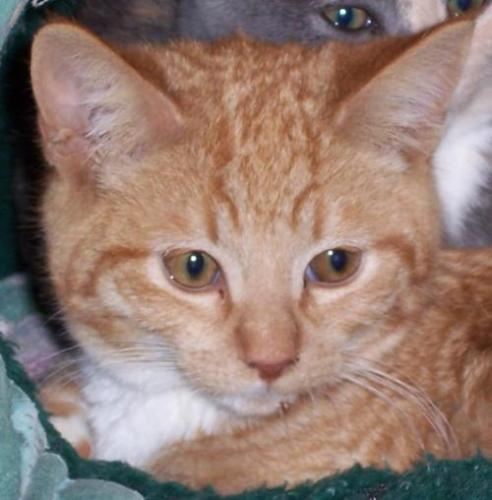


Sample dog image:


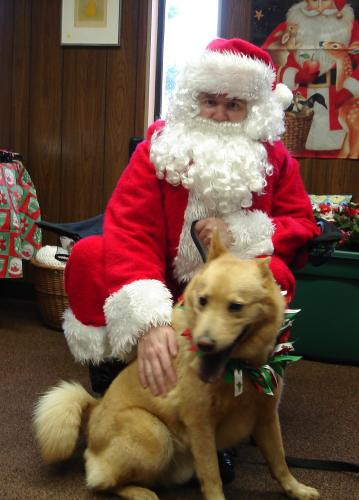


Sample bird image:


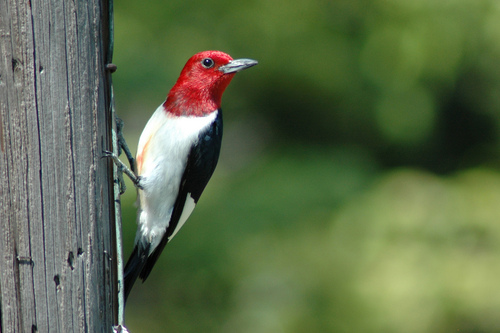

In [10]:
from IPython.display import Image, display
print("Sample cat image:")
display(Image(filename=f"{os.path.join(cats_dir, os.listdir(cats_dir)[0])}"))
print("\nSample dog image:")
display(Image(filename=f"{os.path.join(dogs_dir, os.listdir(dogs_dir)[0])}"))
print("\nSample bird image:")
display(Image(filename=f"{os.path.join(birds_dir, os.listdir(birds_dir)[0])}"))

## Splitting the Train & Test Data

In [11]:
train_eval_dirs = ['train/cats', 'train/dogs', 'train/birds',
                   'eval/cats', 'eval/dogs', 'eval/birds']

for dir in train_eval_dirs:
    if not os.path.exists(os.path.join(base_dir, dir)):
        os.makedirs(os.path.join(base_dir, dir))

        

In [12]:
def split_data(origin, destination, pct_split):
    num_images = int(len(os.listdir(origin))*pct_split)
    for image_name, image_number in zip(sorted(os.listdir(origin)), range(num_images)):
        shutil.move(os.path.join(origin,image_name), destination)

In [13]:
# creating a 70% split for training
split_data(cats_dir, os.path.join(base_dir, 'train/cats'), 0.7)
split_data(dogs_dir, os.path.join(base_dir, 'train/dogs'), 0.7)
split_data(birds_dir, os.path.join(base_dir, 'train/birds'), 0.7)

# move remaining to evaluation
split_data(cats_dir, os.path.join(base_dir, 'eval/cats'), 1)
split_data(dogs_dir, os.path.join(base_dir, 'eval/dogs'), 1)
split_data(birds_dir, os.path.join(base_dir, 'eval/birds'), 1)

In [14]:
for subdir in train_eval_dirs:
    print(f"{subdir} has {len(os.listdir(os.path.join(base_dir, subdir)))}")

train/cats has 8750
train/dogs has 8750
train/birds has 8251
eval/cats has 3751
eval/dogs has 3751
eval/birds has 3537


In [15]:
# removing zero bytes and other extensions that would not be images 
!find /content/data/ -size 0 -exec rm {} +
!find /content/data/ -type f ! -name "*.jpg" -exec rm {} +

In [16]:
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/cats')))} images of cats for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/dogs')))} images of dogs for training")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'train/birds')))} images of birds for training\n")

print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/cats')))} images of cats for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/dogs')))} images of dogs for evaluation")
print(f"There are {len(os.listdir(os.path.join(base_dir, 'eval/birds')))} images of birds for evaluation")

There are 8750 images of cats for training
There are 8749 images of dogs for training
There are 8251 images of birds for training

There are 3749 images of cats for evaluation
There are 3750 images of dogs for evaluation
There are 3537 images of birds for evaluation


## Selecting the Model

In [17]:
from tensorflow.keras import models, layers, optimizers

In [18]:
def create_model():
    model = models.Sequential([
                layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                layers.MaxPooling2D((2,2)),
                layers.Conv2D(64, (3,3), activation='relu'),
                layers.MaxPooling2D((2,2)),
                layers.Conv2D(128, (3,3), activation='relu'),
                layers.MaxPooling2D((2,2)),
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(3, activation='softmax')

    ])
      # Compile the model
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=optimizers.Adam(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

    return model


In [19]:
first_model = create_model()
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Image Data Generator

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
eval_datagen = ImageDataGenerator(rescale=1./255)
train_dir = os.path.join(base_dir, 'train')
eval_dir = os.path.join(base_dir, 'eval')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

eval_generator = eval_datagen.flow_from_directory(
    eval_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 25750 images belonging to 3 classes.
Found 11036 images belonging to 3 classes.


In [22]:
print(f"labels for each class in the train generator are: {train_generator.class_indices}")
print(f"labels for each class in the validation generator are: {eval_generator.class_indices}")

labels for each class in the train generator are: {'birds': 0, 'cats': 1, 'dogs': 2}
labels for each class in the validation generator are: {'birds': 0, 'cats': 1, 'dogs': 2}


# Training the model

In [23]:
first_model_history = first_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=eval_generator,
    validation_steps=80
)

Epoch 1/50
100/100 [==============================] - 30s 180ms/step - loss: 1.1131 - sparse_categorical_accuracy: 0.4909 - val_loss: 0.7755 - val_sparse_categorical_accuracy: 0.6320
Epoch 2/50
100/100 [==============================] - 18s 181ms/step - loss: 0.7559 - sparse_categorical_accuracy: 0.6584 - val_loss: 0.9723 - val_sparse_categorical_accuracy: 0.5297
Epoch 3/50
100/100 [==============================] - 18s 178ms/step - loss: 0.7639 - sparse_categorical_accuracy: 0.6450 - val_loss: 0.6981 - val_sparse_categorical_accuracy: 0.6980
Epoch 4/50
100/100 [==============================] - 21s 207ms/step - loss: 0.6438 - sparse_categorical_accuracy: 0.7150 - val_loss: 0.6942 - val_sparse_categorical_accuracy: 0.6957
Epoch 5/50
100/100 [==============================] - 18s 182ms/step - loss: 0.6016 - sparse_categorical_accuracy: 0.7386 - val_loss: 0.5744 - val_sparse_categorical_accuracy: 0.7402
Epoch 6/50
100/100 [==============================] - 18s 182ms/step - loss: 0.5992 -

# Model Analysis

In [26]:
def get_training_metrics(history):
  
  # This is needed depending on if you used the pretrained model or you trained it yourself
  if not isinstance(history, pd.core.frame.DataFrame):
    history = history.history
  
  acc = history['sparse_categorical_accuracy']
  val_acc = history['val_sparse_categorical_accuracy']

  loss = history['loss']
  val_loss = history['val_loss']

  return acc, val_acc, loss, val_loss

In [27]:
def plot_train_eval(history):
  acc, val_acc, loss, val_loss = get_training_metrics(history)

  acc_plot = pd.DataFrame({"training accuracy":acc, "evaluation accuracy":val_acc})
  acc_plot = sns.lineplot(data=acc_plot)
  acc_plot.set_title('training vs evaluation accuracy')
  acc_plot.set_xlabel('epoch')
  acc_plot.set_ylabel('sparse_categorical_accuracy')
  plt.show()

  print("")

  loss_plot = pd.DataFrame({"training loss":loss, "evaluation loss":val_loss})
  loss_plot = sns.lineplot(data=loss_plot)
  loss_plot.set_title('training vs evaluation loss')
  loss_plot.set_xlabel('epoch')
  loss_plot.set_ylabel('loss')
  plt.show()

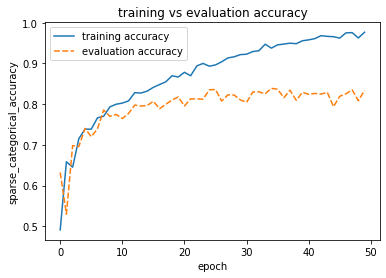

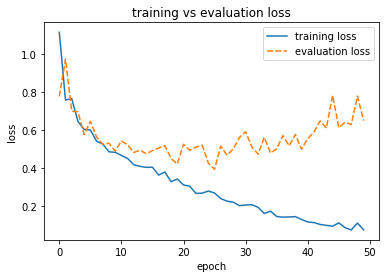

In [28]:
plot_train_eval(first_model_history)